# 5300 Final 2. Gravitational Orbits

Here we solve a two-body problem for gravitational attraction between two bodies in Cartesian coordinates.

We get our equations of motion from the Lagrangian. The Lagrangian is given by $\mathcal{L} = T - U$, where $T = \frac12 m_1 (\dot{x_1^2} + \dot{y_1^2}) + \frac12 m_2 (\dot{x_2^2} + \dot{y_2^2})$ and $U = -\frac{G m_1 m_2}{r}$.

The Euler-Lagrange equation, $\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x}} = \frac{\partial\mathcal{L}}{\partial{x}}$, gives us our equations of motion below.

$\begin{align}
  \ddot{x_1} = -\frac{G m_2 (x_1 - x_2)}{|(x_1 - x_2)^2 + (y_1 - y_2)^2|^{-\frac32}} \\
  \ddot{x_2} = -\frac{G m_1 (x_2 - x_1)}{|(x_1 - x_2)^2 + (y_1 - y_2)^2|^{-\frac32}}  \\
  \ddot{y_1} = -\frac{G m_2 (y_1 - y_2)}{|(x_1 - x_2)^2 + (y_1 - y_2)^2|^{-\frac32}} \\
  \ddot{y_2} = -\frac{G m_1 (y_2 - y_1)}{|(x_1 - x_2)^2 + (y_1 - y_2)^2|^{-\frac32}}
\end{align}$

We define y, an 8-component vector to be used to solve the differential.

$\begin{align}
  \mathbf{y} = \begin{pmatrix}
                x_1(t) \\
                \dot{x_1}(t) \\
                x_2(t) \\
                \dot{x_2}(t) \\
                y_1(t) \\
                \dot{y_1}(t) \\
                y_2(t) \\
                \dot{y_2}(t) \\
                \end{pmatrix}
\end{align}$

In [1]:
%matplotlib inline

In [2]:
#Importing packages that are needed
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [3]:
# Changing common font size to 14
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [4]:
class Orbit:
    """
    This Orbit class implements the parameters and Lagrange's equations for
    a two-body orbit. We will use potentials and associated differential equations
    for central force motion. We are using the gravitational potential:
    U(r) = k r^(-1).
    
    Parameters
    ----------
    k : float
        constant of the potential
    m1 : float
        mass of first body
    m2 : float
        mass of second body
    """
    # Setting values using self
    def __init__(self, k, m1, m2):
        self.k = k
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq in vector
        y, given time t and y value: 
        [dx1/dt d^2x1/dt^2 dx2/dt d^2x2/dt^2 dy1/dt d^2y1/dt^2 dy2/dt d^2y2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with y[0] = x1(t), y[1] = dx1/dt,
            y[2] = x2(t), y[3] = dx2/dt, y[4] = y1(t), y[5] = dy1/dt,
            y[6] = y2(t), and y[7] = dy2/dt
        
        Returns
        -------
        """
        # Creating a variable to make writing out the expressions easier
        keep = self.k*(((y[0] - y[2])**2 + (y[4] - y[6])**2)**(-3/2))
        
        # This returns dx1/dt, d^2x1/dt^2, dx2/dt, and d^2x2/dt^2
        # dy1/dt, d^2y1/dt^2, dy2/dt, and d^2y2/dt^2
        return [ y[1], \
                -keep*self.m2*(y[0] - y[2]), \
                y[3], \
                -keep*self.m1*(y[2] - y[0]), \
                y[5], \
                -keep*self.m2*(y[4] - y[6]), \
                y[7], \
                -keep*self.m1*(y[6] - y[4]) ]
    
    
    def solve_ode(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, \
                  y1_0, y1_dot_0, y2_0, y2_dot_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solves ODE given initial conditions
        We are using odeint, but we can use something else if we want
        We can specify smaller abserr and relerr to get more precision
        Initial conditions have _0 at the end of them
        """
        y = [x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = solution.y
        
        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot

In [5]:
# Creating our start and stop points of the indices
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # start index 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # end index 
    return start_index, stop_index

## Plot orbit and check energy conservation

In [6]:
# Picking a plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

# This is our time array
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Specifying values for k and the masses
k = 17
m1 = 1.
m2 = 1.

# Instantiating our orbits
o = Orbit(k=k, m1=m1, m2=m2)

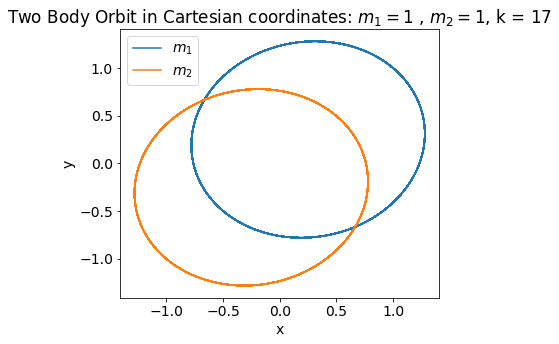

In [7]:
# Specifying initial conditions for our plots
x1_0 = 1.
x1_dot_0 = -1.
x2_0 = -(m1 / m2)*x1_0
x2_dot_0 = -(m1 / m2)*x1_dot_0
y1_0 = 1.
y1_dot_0 = 1.
y2_0 = -(m1 / m2)*y1_0
y2_dot_0 = -(m1 / m2)*y1_dot_0

# Getting our values for our xs, x_dots, ys, and y_dots
x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = \
o.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)

# Starting the plot
fig = plt.figure(figsize=(7,5))
    
# This is our y vs. x plot 
ax = fig.add_subplot(1,1,1)                  

# Plotting x1, x2, y1, and y2 as functions of time
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1[start : stop], y1[start : stop], label=r'$m_1$')
ax.plot(x2[start : stop], y2[start : stop], label=r'$m_2$')

# Giving the plot labels and a title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Two Body Orbit in Cartesian coordinates: $m_1 = 1$ , $m_2 = 1$, k = 17')

# Giving the plot a legend
ax.legend()

fig.tight_layout()

# This allows us to save the figure as a jpg
#fig.savefig('Two Body Cartesian Orbit.jpg', bbox_inches='tight')

This graph shows the orbits of two masses of equal mass. Their orbits are identical in shape as both masses orbit a singular center of mass.

## m1 >> m2

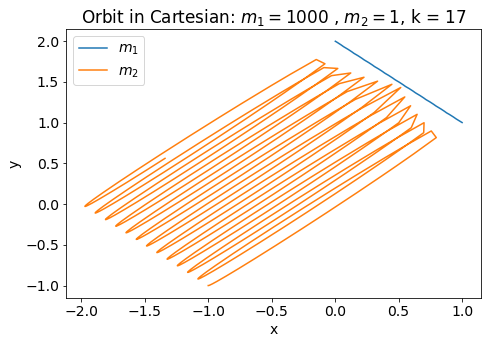

In [8]:
# Creating new orbit with m1 >> m2
o2 = Orbit(k=k, m1=1000*m1, m2=m2)

# Specifying new time array to see movement of m2 better
t_pts2 = np.arange(t_start, 1+delta_t, delta_t) 
big = o2.solve_ode(t_pts2, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)

# Start a new plot
fig2 = plt.figure(figsize=(7,5))

ax2 = fig2.add_subplot(1,1,1)

# Plotting x1, x2, y1, and y2 vs. time
ax2.plot(big[0], big[4], label=r'$m_1$')
ax2.plot(big[2], big[6], label=r'$m_2$')

# Giving our plot labels and a title
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Orbit in Cartesian: $m_1 = 1000$ , $m_2 = 1$, k = 17')
ax2.legend()

fig2.tight_layout()

When one body is much more massive than the other, in this case $m_1 = 1000m_2$, we are in its rest frame. In the heavier body's frame, we are not moving and we can see the other body orbiting very quickly. The graph shows $m_1$ moving almost linearly while $m_2$ orbits the center of mass very quickly.